# Questions from BW 108, Measles

1. Read the "weekly cases by onset date" into a data frame. Create a line plot comparing the week_start column with the number of cases. Would the recent outbreak in the US seem to fit the usual pattern, or is this an unusually high number of cases?
2. The CDC says that measles isn't a seasonal disease. Let's try to see that visually, using data from 2023 and 2024: Create a new line plot, whose x axis represents the months of the year. Plot the number of cases from each 2023 and 2024 using a separate line, in a different color. Do we see any obvious common peaks or dips between the two years?

In [7]:
import pandas as pd
import os 

dirname = '/Users/reuven/BambooWeekly/notebooks/data/bw-108/'
filename = 'weekly-cases-by-onset-date.csv'

df = pd.read_csv(os.path.join(dirname, filename),
                usecols=['week_start', 'cases'],
                parse_dates=['week_start'],
                index_col='week_start')
df

,cases
week_start,
2023-01-01,0
2023-01-08,1
2023-01-15,1
2023-01-22,0
2023-01-29,0
...,...
2025-01-26,13
2025-02-02,21
2025-02-09,52


In [8]:
df.dtypes

cases    int64
dtype: object

In [9]:
df.index

DatetimeIndex(['2023-01-01', '2023-01-08', '2023-01-15', '2023-01-22',
               '2023-01-29', '2023-02-05', '2023-02-12', '2023-02-19',
               '2023-02-26', '2023-03-05',
               ...
               '2024-12-22', '2024-12-29', '2025-01-05', '2025-01-12',
               '2025-01-19', '2025-01-26', '2025-02-02', '2025-02-09',
               '2025-02-16', '2025-02-23'],
              dtype='datetime64[ns]', name='week_start', length=113, freq=None)

<Axes: xlabel='week_start'>

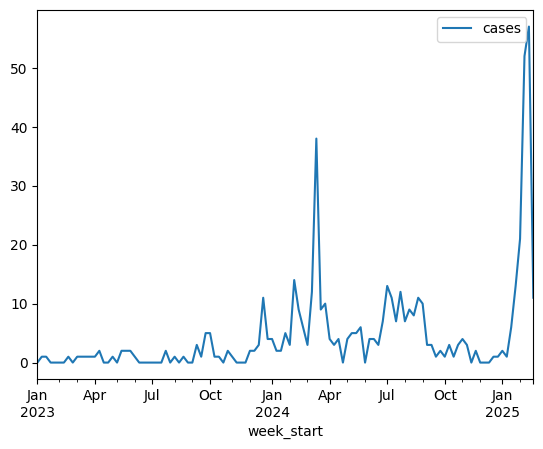

In [10]:
df.plot.line()

The CDC says that measles isn't a seasonal disease. Let's try to see that visually, using data from 2023 and 2024: Create a new line plot, whose x axis represents the months of the year. Plot the number of cases from each 2023 and 2024 using a separate line, in a different color. Do we see any obvious common peaks or dips between the two years?

<Axes: xlabel='month_names'>

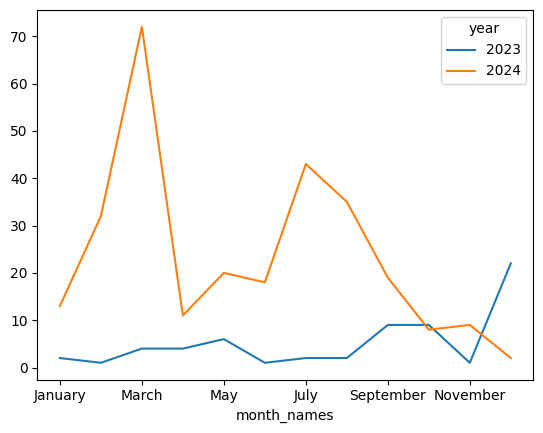

In [17]:
(
    df
    .assign(month_names = df.index.month_name(),
            year = df.index.year)
    .loc['2023':'2024']
    .pivot_table(index='month_names',
                 columns='year',
                 values='cases',
                 aggfunc='sum',
                 sort=False)
   .plot.line()
)